#### Задание 1.1.3

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tan(x)

def ReLU(x):
    return max(0,x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforwardSigmoid(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    def feedforwardTanh(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
    def feedforwardReLU(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

class OurNeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward_1_1(self, x):
        out_h1 = self.h1.feedforwardSigmoid(x)
        out_h2 = self.h2.feedforwardSigmoid(x)
        out_h3 = self.h3.feedforwardSigmoid(x)
        out_o1 = self.o1.feedforwardSigmoid(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    def feedforward_1_2(self, x):
        out_h1 = self.h1.feedforwardTanh(x)
        out_h2 = self.h2.feedforwardTanh(x)
        out_h3 = self.h3.feedforwardTanh(x)
        out_o1 = self.o1.feedforwardTanh(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    def feedforward_1_3(self, x):
        out_h1 = self.h1.feedforwardReLU(x)
        out_h2 = self.h2.feedforwardReLU(x)
        out_h3 = self.h3.feedforwardReLU(x)
        out_o1 = self.o1.feedforwardReLU(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    
class OurNeuralNetwork2:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    def feedforward_2_1(self, x):
        out_h1 = self.h1.feedforwardSigmoid(x)
        out_h2 = self.h2.feedforwardSigmoid(x)
        out_o1 = self.o1.feedforwardSigmoid(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforwardSigmoid(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    def feedforward_2_2(self, x):
        out_h1 = self.h1.feedforwardTanh(x)
        out_h2 = self.h2.feedforwardTanh(x)
        out_o1 = self.o1.feedforwardTanh(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforwardTanh(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    def feedforward_2_3(self, x):
        out_h1 = self.h1.feedforwardReLU(x)
        out_h2 = self.h2.feedforwardReLU(x)
        out_o1 = self.o1.feedforwardReLU(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforwardReLU(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    
network1 = OurNeuralNetwork1()
x1 = np.array([1, 2, 3])
print('Сигмоид первой нейронной сети: ', network1.feedforward_1_1(x1))
print('Тангенс первой нейронной сети: ', network1.feedforward_1_2(x1))
print('ReLU первой нейронной сети: ', network1.feedforward_1_3(x1))

network2 = OurNeuralNetwork2()
x2 = np.array([2, 3])
print('Сигмоид первой нейронной сети: ', network2.feedforward_2_1(x2))
print('Тангенс первой нейронной сети: ', network2.feedforward_2_2(x2))
print('ReLU первой нейронной сети: ', network2.feedforward_2_3(x2))

Сигмоид первой нейронной сети:  0.8067238139969796
Тангенс первой нейронной сети:  -0.21713906537767277
ReLU первой нейронной сети:  4.5
Сигмоид первой нейронной сети:  (0.8757270529783324, 0.8757270529783324)
Тангенс первой нейронной сети:  (1.1555911185916798, 1.1555911185916798)
ReLU первой нейронной сети:  (4, 4)


#### Задание 1.2.1

"iris" Dataset Sizes: (150, 4) (150,)
Train/Test Sizes: (120, 4) (30, 4) (120,) (30,)
[1 0 2 2 0 0 2 2 2 0 0 1 2 1 2]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2]
Test Accuracy : 0.933
Training Accuracy : 0.992
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
Loss :  0.062378386935669564
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  641
Name of Output Layer Activation Function :  softmax


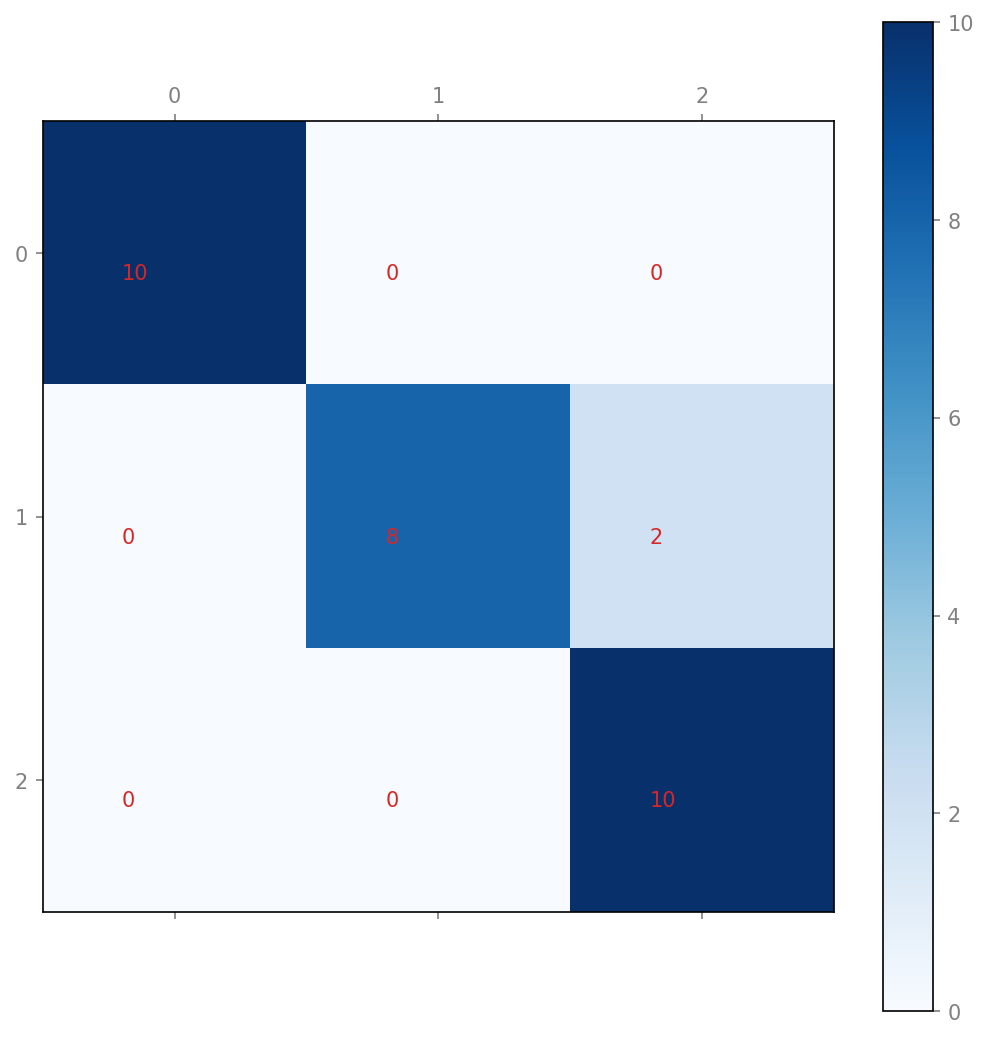

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor

iris = load_iris() 
X_iris, Y_iris = iris.data, iris.target 
print('"iris" Dataset Sizes:', X_iris.shape, Y_iris.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris, train_size=0.80, test_size=0.20, stratify=Y_iris, 
                                                    random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

mlp_classifier = MLPClassifier(random_state=123, max_iter=1000)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15]) 
print(Y_test[:15]) 
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds) 
    print(conf_mat) 
    fig = plt.figure(figsize=(3,3)) 
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1) 
    plt.yticks(range(3), range(3)) 
    plt.xticks(range(3), range(3)) 
    plt.colorbar(); 
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))
print("Loss : ", mlp_classifier.loss_) 
print("Number of Coefs : ", len(mlp_classifier.coefs_)) 
print("Number of Intercepts : ", len(mlp_classifier.intercepts_)) 
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_) 
print("Name of Output Layer Activation Function : ",mlp_classifier.out_activation_)

In [3]:
salary = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')

X_salary = salary.iloc[:, :-1].values 
Y_salary = salary.iloc[:, 1].values 
print('"salary" Dataset Sizes:',X_salary.shape, Y_salary.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_salary, Y_salary, train_size=0.80, test_size=0.20, random_state=123) 

mlp_regressor = MLPRegressor(random_state=123, max_iter=50000) 
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10]) 
print(Y_test[:10]) 
print('Test R*2 Score : %.3f'%mlp_regressor.score(X_test, Y_test)) 
print('Training R*2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))
print("Loss :", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_)) 
print("Number of Iterations for Which Estimator Ran :", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function :",mlp_regressor.out_activation_)

"salary" Dataset Sizes: (30, 1) (30,)
[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971  117759.05793283]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R*2 Score : 0.971
Training R*2 Score : 0.948
Loss : 16873681.68996009
Number of Coefs :  2
Number of Iterations for Which Estimator Ran : 30344
Name of Output Layer Activation Function : identity
